In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv("D:/Data Science/data swts/TelcoCustomerChurn.csv")

In [3]:
train.head()

,customerID,gender,V1,V2,V3,V4,V5,V6,V7,V8,...,V10,V11,V12,V13,V14,V15,V16,V17,V18,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
def display_all(df):
    with pd.option_context("display.max_columns",50):
        display(df)

In [5]:
display_all(train.head())

,customerID,gender,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
def df_summary(df):
    df_U=df.nunique()
    df_M=df.isnull().sum()
    df_I=df.dtypes
    
    df_U=df_U.to_frame().reset_index()
    df_M=df_M.to_frame().reset_index()
    df_I=df_I.to_frame().reset_index()
    
    df_U=df_U.rename(columns= { 0 : "Unique Data"})
    df_M=df_M.rename(columns= { 0 : "Missing Data"})
    df_I=df_I.rename(columns= { 0 : "Data types"})
    
    Output = pd.merge(pd.merge(df_M,df_U,on="index"),df_I,on="index")
    
    return Output


In [7]:
df_summary(train)

,index,Missing Data,Unique Data,Data types
0,customerID,0,7043,object
1,gender,0,2,object
2,V1,0,2,int64
3,V2,0,2,object
4,V3,0,2,object
5,V4,0,73,int64
6,V5,0,2,object
7,V6,0,3,object
8,V7,0,3,object
9,V8,0,3,object


No     5174
Yes    1869
Name: Churn, dtype: int64


<AxesSubplot:>

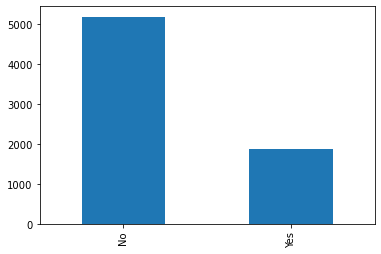

In [8]:
print(train.Churn.value_counts())
train.Churn.value_counts().plot.bar()

In [9]:
train['V18'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: V18, dtype: object

In [10]:
train.V18=pd.to_numeric(train.V18,errors='coerce')
# errors='coerce' : invalid parsing will be set as Nan.

In [11]:
train.V18.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: V18, dtype: float64

In [12]:
train.isnull().sum()

customerID     0
gender         0
V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18           11
Churn          0
dtype: int64

In [13]:
train['V18']=train['V18'].fillna(train['V18'].mean())

In [14]:
train.drop('customerID',axis=1,inplace=True)

In [15]:
train.columns

Index(['gender', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'Churn'],
      dtype='object')

In [16]:
# Separating numerical and categorical columns

Num_cols=train.select_dtypes(include=['float64','int64']).columns.tolist()
Cat_cols=train.select_dtypes(include=['object']).columns.tolist()

In [17]:
Num_cols

['V1', 'V4', 'V17', 'V18']

In [18]:
Cat_cols

['gender',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'Churn']

In [19]:
train[Cat_cols].describe()

,gender,V2,V3,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


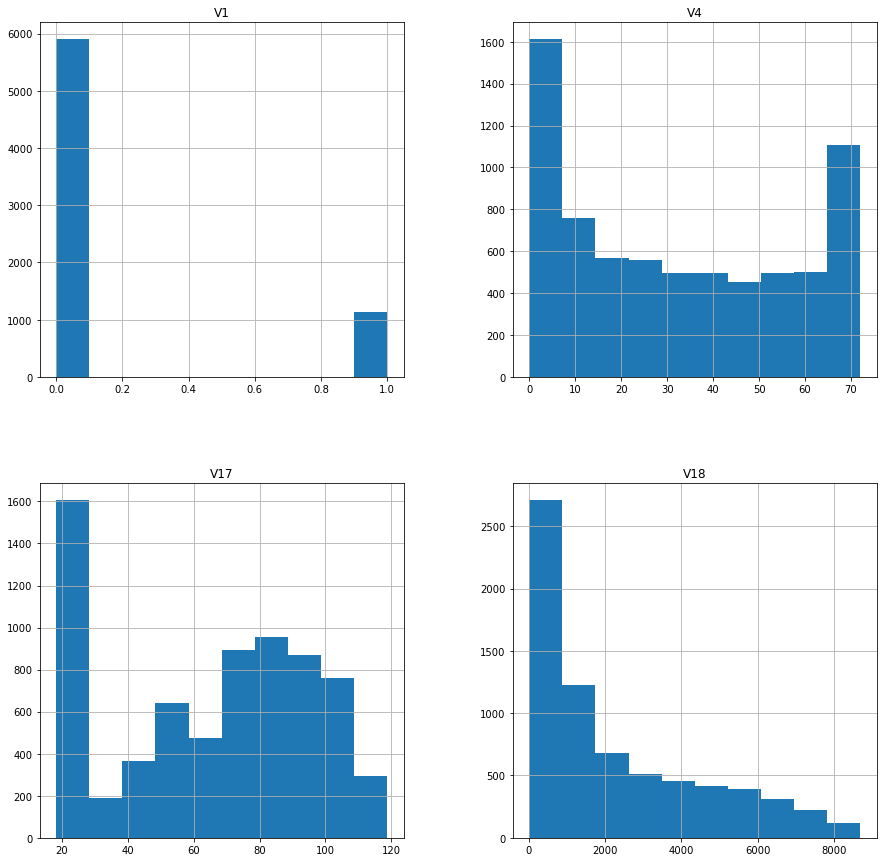

In [20]:
train.hist(figsize=(15,15));

In [21]:
# we can use the data as it is even if it is skewed because we are using SVM and not linear model.
# linear model assumes that data is normally distributed is the reason we have to sort and manage the data. However, the same is not applied for SVM

In [22]:
def cat_col_desc(data):
    col_list=train.select_dtypes(include=['object']).columns.tolist()
    for i in col_list:
        print('Feature :',i)
        print('Count of unique values :',len(set(data[i]))) # set data structure drops the repeated values
        print('Unique Values :',set(data[i]))
        print('value counts :\n',data[i].value_counts())
        print()

In [23]:
cat_col_desc(train)

Feature : gender
Count of unique values : 2
Unique Values : {'Male', 'Female'}
value counts :
 Male      3555
Female    3488
Name: gender, dtype: int64

Feature : V2
Count of unique values : 2
Unique Values : {'No', 'Yes'}
value counts :
 No     3641
Yes    3402
Name: V2, dtype: int64

Feature : V3
Count of unique values : 2
Unique Values : {'No', 'Yes'}
value counts :
 No     4933
Yes    2110
Name: V3, dtype: int64

Feature : V5
Count of unique values : 2
Unique Values : {'No', 'Yes'}
value counts :
 Yes    6361
No      682
Name: V5, dtype: int64

Feature : V6
Count of unique values : 3
Unique Values : {'No', 'No phone service', 'Yes'}
value counts :
 No                  3390
Yes                 2971
No phone service     682
Name: V6, dtype: int64

Feature : V7
Count of unique values : 3
Unique Values : {'No', 'DSL', 'Fiber optic'}
value counts :
 Fiber optic    3096
DSL            2421
No             1526
Name: V7, dtype: int64

Feature : V8
Count of unique values : 3
Unique Values :

<AxesSubplot:xlabel='Churn', ylabel='count'>

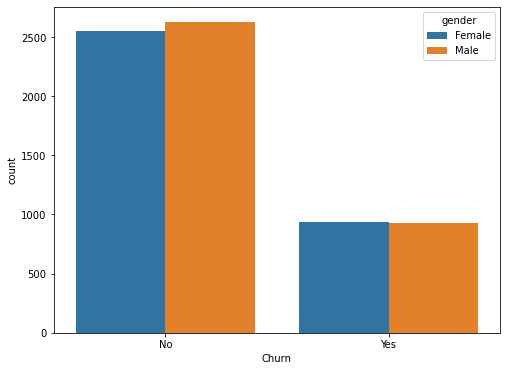

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(x='Churn',hue='gender', data=train)

In [25]:
Binary_class=train[Cat_cols].nunique()[train[Cat_cols].nunique()==2].keys().tolist()
Multi_class=train[Cat_cols].nunique()[train[Cat_cols].nunique()>2].keys().tolist()

In [26]:
Binary_class

['gender', 'V2', 'V3', 'V5', 'V15', 'Churn']

In [27]:
Multi_class

['V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16']

In [28]:
print('Number of Male entries :',len(train[train['gender']=='Male']))
print('Number of Female entries :',len(train[train['gender']=='Female']))

Number of Male entries : 3555
Number of Female entries : 3488


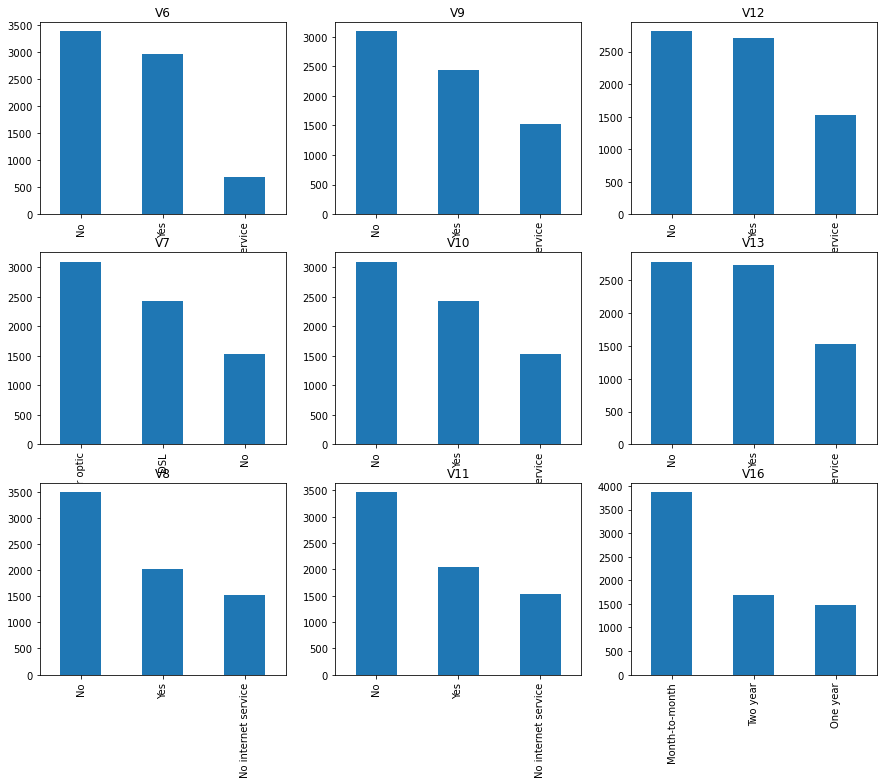

In [29]:
#Multiclass varibale distribution
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,12))
for i, item in enumerate(Multi_class): # enumerate adds a counter to any list
    if i<3:
        ax=train[item].value_counts().plot(kind='bar',ax=axes[i,0])
    elif i>=3 and i<6:
        ax=train[item].value_counts().plot(kind='bar',ax=axes[i-3,1])
    elif i<9:
        ax=train[item].value_counts().plot(kind='bar',ax=axes[i-6,2])
    ax.set_title(item)

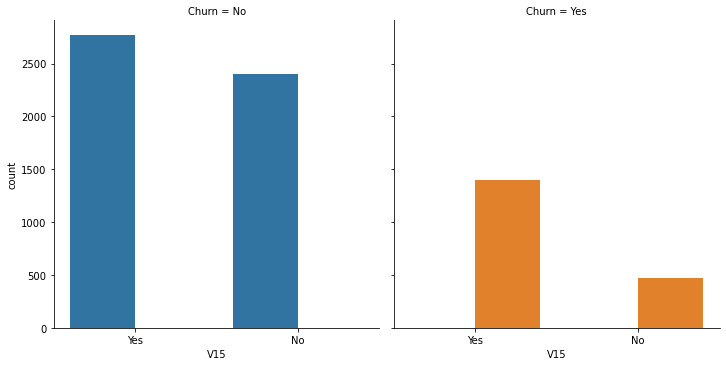

In [30]:
sns.catplot(x='V15',hue='Churn',col='Churn',data=train,kind='count')

In [31]:
# catplot divides data on basis of category and plots the data. 
# swarm plot tells us about the distribution of couple of categories kind of violin.

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in Binary_class:
    train[i]=le.fit_transform(train[i])
    

In [33]:
for i in Multi_class:
    train[i]=le.fit_transform(train[i])

In [34]:
train.head()

,gender,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [35]:
from sklearn.model_selection import train_test_split
X=train.drop(['Churn'],axis=1)
Y=train['Churn']

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=2000)
rfc.fit(X,Y) # we are just selecting the features is teh raeson we are not considering X_train, Y_train.
# However, in prediction we need to put X_train, Y_train instead of X,Y.
imp=pd.Series(data=rfc.feature_importances_,index=X.columns).sort_values(ascending=False)

In [38]:
imp 
#The feature importance describes which features are relevant. 
#It can help with better understanding of the solved problem and sometimes lead to model improvements by employing the feature selection.

V18       0.191579
V17       0.180064
V4        0.155680
V14       0.079016
V16       0.051045
V8        0.045796
V11       0.041288
gender    0.027871
V7        0.027833
V9        0.027634
V15       0.025367
V10       0.022952
V2        0.022940
V6        0.022023
V1        0.020661
V3        0.019519
V13       0.017048
V12       0.016783
V5        0.004901
dtype: float64

Index(['V18', 'V17', 'V4', 'V14', 'V16', 'V8', 'V11', 'gender'], dtype='object')


<AxesSubplot:>

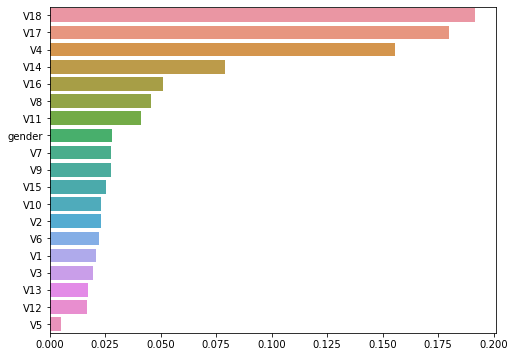

In [39]:
print(imp.keys()[:8])
plt.figure(figsize=(8,6))
sns.barplot(y=imp.index,x=imp.values,orient='h')

In [40]:
df_final=train[imp.keys()[:8]]
X1=df_final
Y1=train['Churn']
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.33,random_state=42)

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc_rfc=SVC()
svc_rfc.fit(X1_train,Y1_train)

SVC()

In [42]:
Y_pred=svc_rfc.predict(X1_test)

In [43]:
accuracy_score(Y1_test,Y_pred)

0.7298924731182795

In [44]:
from sklearn.model_selection import KFold,cross_validate,StratifiedKFold

kf=KFold(n_splits=5,shuffle=True)
cv_results=cross_validate(svc_rfc,X1,Y1,cv=kf,scoring='accuracy',return_train_score=True)

In [45]:
cv_results

{'fit_time': array([3.84322906, 3.15323949, 3.24380445, 3.98333025, 3.38290238]),
 'score_time': array([1.67268705, 1.61314607, 1.49155974, 1.5395925 , 1.70871329]),
 'test_score': array([0.73740241, 0.75159688, 0.7310149 , 0.70951705, 0.74360795]),
 'train_score': array([0.73393681, 0.73038694, 0.73553426, 0.74090506, 0.73238687])}

In [46]:
skf=StratifiedKFold(n_splits=5,shuffle=True)

cross_validate(svc_rfc,X1,Y1,cv=skf,scoring='accuracy',return_train_score=True)

{'fit_time': array([3.62357354, 3.60155773, 3.46502709, 3.44744921, 3.35538316]),
 'score_time': array([1.4660418 , 1.58962989, 1.56311083, 1.49406171, 1.49205947]),
 'test_score': array([0.73456352, 0.73456352, 0.73456352, 0.73508523, 0.734375  ]),
 'train_score': array([0.73464679, 0.73464679, 0.73464679, 0.73451642, 0.73469388])}

In [47]:
s_cv_results=cross_validate(svc_rfc,X1,Y1,cv=skf,scoring='accuracy',return_train_score=True)

In [48]:
s_cv_results

{'fit_time': array([3.24830675, 3.29133725, 3.29233861, 3.27432561, 3.43043542]),
 'score_time': array([1.75024366, 1.61214709, 1.59393835, 1.47905135, 1.4890573 ]),
 'test_score': array([0.73456352, 0.73456352, 0.73456352, 0.73508523, 0.734375  ]),
 'train_score': array([0.73464679, 0.73464679, 0.73464679, 0.73451642, 0.73469388])}

In [49]:
from sklearn.model_selection import RandomizedSearchCV
model_parameteres={
    'kernel':['rbf','poly','linear'], # RBF:Radial Bias Function
    'C':[1,0.1,0.01,10], #Slack variable
    'gamma':[0.001,0.01] 
}

In [53]:
rscv=RandomizedSearchCV(estimator=svc_rfc,param_distributions=model_parameteres,scoring='accuracy')
# RandomizedSearchCV is Hyperparameter tunning technique

In [ ]:
rscv.fit(X1_train,Y1_train)

In [52]:
final_model=SVC(**rscv.best_params)
final_model.fit(X1_train,Y1_train)